# 2022년 k-ium 의료인공지능경진대회
##단국대학교 컴퓨터공학과 정민준
###jmj284@gmail.com, 010-9391-0801


#<데이터 전처리 및 모델 사용&평가>


##<학습 및 테스트 환경> 
본 프로그램은 'Google Colab' 환경에서 작성 되었습니다.<br>
플랫폼: 'Goolge Colab'<br> 
GPU: Tesla T4<br> 
GPU API: cuda<br>
<br>사용한 언어 및 라이브러리는 아래와 같습니다.
<br>

## <언어> <br>

###1. python3
Version: 3.7.14 (default, Sep  8 2022, 00:06:44)<br>
GCC 7.5.0<br>

## <라이브러리> <br>

###1. transformers
Version: 4.23.1<br> 
License: Apache<br>

###2. torch
Version: 1.12.1+cu113<br>
License: BSD-3<br>

###3. tensorflow)<br>
Version: 2.9.2<br>
License: Apache 2.0<br>

###4. keras
Version: 2.9.0<br>
License: Apache 2.0<br>

###5. scikit-learn
Version: 1.0.2<br>
License: new BSD<br>

###6. pandas
Version: 1.3.5<br> 
License: BSD-3-Clause<br>

###7. numpy
Version: 1.21.6<br>
License: BSD<br>

###8. matplotlib
Version: 3.2.2<br> 
License: PSF<br>

## <사전학습모델> 
bert-base-multilingual-cased<br>
License: Apache 2.0

## <참고자료>

1. https://mccormickml.com/2019/07/22/BERT-fine-tuning/

2. https://colab.research.google.com/drive/1tIf0Ugdqg4qT7gcxia3tL7und64Rv1dP#scrollTo=P58qy4--s5_x

3. https://velog.io/@seolini43/일상연애-주제의-한국어-대화-BERT로-이진-분류-모델-만들기파이썬Colab-코드



#1. 라이브러리 호출, 버전 및 라이센스 확인

In [1]:
#트랜스포머 모듈 설치
#colab이 아닌 로컬 환경에서는 아래 주석처리후 터미널에서 설치 필요
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 33.8 MB/s 
     |████████████████████████████████| 163 kB 68.0 MB/s 
     |████████████████████████████████| 7.6 MB 64.4 MB/s 


In [2]:
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import random
import time
import datetime

In [3]:
#라이브러리 버전 확인, 확인 필요시 주석 제거 후 사용

import sys
'''
print(sys.version)
print()
!pip show transformers
print()
!pip show torch
print()
!pip show tensorflow
print()
!pip show keras 
print()
!pip show scikit-learn 
print()
!pip show pandas
print()
!pip show numpy
print()
!pip show matplotlib
'''

'\nprint(sys.version)\nprint()\n!pip show transformers\nprint()\n!pip show torch\nprint()\n!pip show tensorflow\nprint()\n!pip show keras \nprint()\n!pip show scikit-learn \nprint()\n!pip show pandas\nprint()\n!pip show numpy\nprint()\n!pip show matplotlib\n'

In [4]:
#코랩 환경에서 구글 드라이브 사용시 마운트 필요, 불필요 혹은 오류 발생시 주석 처리 후 실행
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


#2. 모델 호출

In [5]:
#모델 호출

'''
mdoel은 5개의 파일로 이루어져 있다.
1. config.json
2. pytorch_model.bin
3. special_tokens_map.json
4. tokenizer_config.json
5. vocab.txt
'''
#model_path 변수에 사용할 모델의 경로 삽입
model_path = '/drive/MyDrive/submit_model'

print("#################<모델 호출>#################")
print()
print("<경로에 존재해야 하는 파일들>")
print("1. config.json")
print("2. pytorch_model.bin")
print("3. special_tokens_map.json")
print("4. tokenizer_config.json")
print("5. vocab.txt")
print()
print("예시) /drive/MyDrive/submit_model")
model_path = input("입력) 위의 예시와 같이 모델의 5개 파일이 존재하는 디렉토리의 경로를 입력하세요: ")
print()
print("모델 호출중...")
print("#########################################")


#토크나이저 할당
tokenizer = BertTokenizer.from_pretrained(model_path)

#모델할당
model = BertForSequenceClassification.from_pretrained(model_path).to("cuda")

print("모델 호출 성공!")

#################<모델 호출>#################

<경로에 존재해야 하는 파일들>
1. config.json
2. pytorch_model.bin
3. special_tokens_map.json
4. tokenizer_config.json
5. vocab.txt

예시) /drive/MyDrive/submit_model
입력) 위의 예시와 같이 모델의 5개 파일이 존재하는 디렉토리의 경로를 입력하세요: /drive/MyDrive/no_valid_model

모델 호출중...
#########################################
모델 호출 성공!


#3. 데이터 호출

In [6]:
import csv

#평가할 데이터 호출
#data_path 변수에 평가 및 입력 데이터(csv파일) 경로 삽입
data_path = '/drive/MyDrive/TrainSet _1st.csv'

print("#################<데이터 호출>#################")
print()
print("예시) /drive/MyDrive/TrainSet _1st.csv")
data_path = input("위의 예시와 같이 평가할 Data Set 파일이 존재하는 디렉토리의 경로를 입력하세요: ")
print()
print("##########################################")

data = pd.read_csv(data_path,encoding="utf-8")

#자료의 컬럼명을 통일 시켜주기
data.columns=['Findings','Conclusion','AcuteInfarction']

#Findings 컬럼과 Conclusion 컬럼을 합쳐준다.
for i in range(len(data)):
  data['Findings'][i] = str(data['Findings'][i]) + ' ' + str(data['Conclusion'][i]) 

#test = data[:], data의 이름을 test로 바꿔줌, 아래의 방법이 메모리 절약에 유리
test = data

print("데이터 셋 호출 성공!")

#입력 데이터 확인
test.head()



#################<데이터 호출>#################

예시) /drive/MyDrive/TrainSet _1st.csv
위의 예시와 같이 평가할 Data Set 파일이 존재하는 디렉토리의 경로를 입력하세요: /drive/MyDrive/TrainSet _1st.csv

##########################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


데이터 셋 호출 성공!


,Findings,Conclusion,AcuteInfarction
0,Clinical information : 두부외상 후 후유증 평가\r\n\r\nAx...,1. Encephalomalacic change in both frontal lob...,0
1,Clinical information : lung cancer\nAxial T1WI...,1. No change of focal enhancing lesion in left...,0
2,Clinical information : Multiple Sclerosis\r\n\...,No significant interval change of abnormal hyp...,0
3,Clinical information : patient with DLBCL.\r\n...,1. Decreased extent of enhancing mass in the l...,0
4,Clinical information : Transient cerebral isch...,"1. Acute infarctions at right BG, right F-P-T ...",1


#4. 모델 사용

In [7]:
#코랩 환경에서 gpu 사용가능 여부를 판별 및 device 할당 위해서 사용

if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.') 

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [8]:
#코랩 환경에서 gpu 캐시 초기화를 위해서 사용, 필요시 주석 제거하고 사용, 오류 발생시 주석 처리 필요
'''
import gc
import torch

gc.collect()
torch.cuda.empty_cache()
'''

'\nimport gc\nimport torch\n\ngc.collect()\ntorch.cuda.empty_cache()\n'

In [9]:
# 시그모이드
def sigmoid(x): 
    return 1.0/(1 + np.exp(-x))

def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))


test_ans = [] # 모델의 결과 저장
test_prob = [] # 가능성 저장

# 시작 시간 설정
t0 = time.time()

# 데이터 전처리
def convert_input_data(sentences):
    sentences = ["[CLS] " + str(sentences) + " [SEP]"]

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 510

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

#모델 사용
def Determining_Acute_Ischemic_Stroke(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    
    #시그모이드 함수, 확률 판단
    pred = sigmoid(logits)
    
    #결과 판단
    result = np.argmax(pred)

    return [result,pred]

# 이진 분류 결과(0 or 1)이 담길 정답 리스트
test_ans = []
# 이진 분류 결과의 확률([0~1,0~1])이 담길 정답 리스트
test_prob = []

# 입력 데이터
d = test.Findings

# 실제 정답 
labels = test.AcuteInfarction

print('분류중...')

for i in range(len(d)):
  # 함수 호출, 이진분류 결과는 a, 확률은 p
  a,p = Determining_Acute_Ischemic_Stroke(d[i])
  test_ans.append(a) # 결과 값은 test_ans에 저장
  test_prob.append(p) # 확률 값은 test_prob에 저장


print("분류 완료!")
print("분류에 소요된 시간: {:}".format(format_time(time.time() - t0)))


분류중...
분류 완료!
분류에 소요된 시간: 0:03:44


#5. 모델 평가

AUC Score: 0.999155



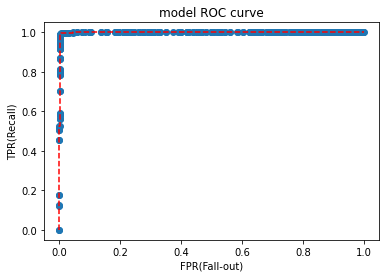

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# probabilty중 정답이 1일 확률이 담길 리스트 
t_prob =[]

# probabilty중 정답이 1일 확률(model.predict_proba() 와 동일)
for i in test_prob:
  t_prob.append(i[0][1])

# roc_curve 그래프 그리기
fpr, tpr, thresholds = roc_curve(labels, t_prob)

roc = pd.DataFrame({'FPR(Fall-out)': fpr, 'TPRate(Recall)': tpr, 'Threshold': thresholds})

plt.scatter(fpr, tpr)
plt.title('model ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');
plt.plot(fpr, tpr, 'r--')

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 최적의 threshold
#print('idx:',optimal_idx, 'threshold:', optimal_threshold)

# AUC 면적 구하기
auc_score = roc_auc_score(labels, t_prob)
print('AUC Score:',round(auc_score,6))
print()